In [7]:
%load_ext autoreload
%autoreload 2 

In [8]:
%reload_ext autoreload

In [9]:
import sys
import os
import pandas as pd
import datetime 
import os
os.chdir('/home/gops/work/DigitalHive')
from src.core.advanced_analytics import AdvancedAnalytics
from src.utils.cache import AnalysisCache
import random
import time


In [32]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse
import json
import time
import random
from src.utils.rate_limiter import RateLimiter
from src.utils.cache import AnalysisCache

class AdvancedAnalytics:
    def __init__(self, headers=None):
        self.headers = headers or {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
        }
        self.rate_limiter = RateLimiter(requests_per_minute=5)
        self.cache = AnalysisCache(cache_dir="output/cache")

        # BrightData Proxy Credentials
        self.username = "brd-customer-hl_8cb1b875-zone-residential_proxy1"
        self.password = "cic599g64vby"
        self.port = 33335
        self.proxy_url = "brd.superproxy.io"
        
    def get_proxy(self):
        """Generate a rotating proxy URL for BrightData."""
        session_id = random.random()  # Generate a unique session
        proxy = f"http://{self.username}-country-us-session-{session_id}:{self.password}@{self.proxy_url}:{self.port}"
        return {"http": proxy, "https": proxy}

    def fetch_google_results(self, product, location, pages=1):
        """Fetch Google search results using BrightData proxy with SSL verification disabled."""
        cached_results = self.cache.get(f"{product}_{location}")
        if cached_results:
            return cached_results  # Return cached results if available

        base_url = "https://www.google.com/search"
        query = f"{product} in {location}"
        all_links = []
        
        for page in range(pages):
            self.rate_limiter.wait()
            start = page * 10
            params = {'q': '+'.join(query.split()), 'start': start}

            # Rotate Proxy and User-Agent
            proxy = self.get_proxy()
            user_agents = [
                "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36",
                "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36",
                "Mozilla/5.0 (iPhone; CPU iPhone OS 15_0 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.0 Mobile/15E148 Safari/604.1"
            ]
            headers = {
                "User-Agent": "Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0.3 Mobile/15E148 Safari/604.1"
            }
            # response = requests.get(url, headers=headers, proxies=proxy)
            # headers = {"User-Agent": random.choice(user_agents)}

            try:
                response = requests.get(base_url, params=params, headers=headers, proxies=proxy, timeout=10, verify=False)
                response.raise_for_status()
                soup = BeautifulSoup(response.text, 'html.parser')

                for result in soup.select('a'):
                    href = result.get('href')
                    if href and 'http' in href:
                        all_links.append(href)

                time.sleep(random.uniform(5, 15))  # Random delay to prevent detection

            except requests.exceptions.RequestException as e:
                print(f"Proxy Request Failed: {e}")
                continue  # Skip to next proxy session

        self.cache.set(f"{product}_{location}", all_links)
        return all_links


In [33]:
analytics = AdvancedAnalytics()
cache = AnalysisCache()

In [34]:
analytics.fetch_google_results('Pontoon Boat Rentals',location='United States',pages=1)

/home/gops/work/DigitalHive/venv/lib/python3.10/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'brd.superproxy.io'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


['/httpservice/retry/enablejs?sei=S9-RZ5n6IbKVwbkPwva7wQM',
 'https://support.google.com/websearch']

In [2]:
import requests
APIKEY='598eaef919caac270297fe6614d75554'
query='Pontoon Boat Rentals in United States'
payload = {'api_key': APIKEY, 'query': query, 'country_code': 'us', 'tld': '.com','NUM':3}
r = requests.get('https://api.scraperapi.com/structured/google/search', params=payload)
print(r.text)

{"search_information":{"query_displayed":"Pontoon Boat Rentals in United States"},"organic_results":[{"position":0,"title":"2025 Top United States Pontoon Boat Rentals","snippet":"The best pontoon rentals in the United States. Browse, book, and get out onto the water with local captains and boat owners.","highlighs":["pontoon rentals","United States","boat"],"link":"https://www.getmyboat.com/boat-rental/pontoon-boat-rentals/United-States/","rating":4.9,"rating_votes":500000,"displayed_link":"https://www.getmyboat.com › Boat Rentals › US"},{"position":1,"title":"Rent the best Texas pontoon boat rentals of 2025","snippet":"Rental prices can range from $200 to $1,000 plus depending on the boat rental itself and the length of time of the rental. How many people can fit on the boat ...","highlighs":["boat rental","of the"],"link":"https://www.boatsetter.com/pontoon-boat-rentals/tx--united-states","rating":5,"rating_votes":266718,"displayed_link":"https://www.boatsetter.com › tx--united-stat

{'local_packs': [{'details': ['Lake Austin Pontoon Rentals5.0(70)',
                              'Boat rental serviceAustin, TX"The boat itself '
                              'was kept clean and had plenty of space for our '
                              'party."'],
                  'position': 13,
                  'rating': 5,
                  'rating_vote_count': 70,
                  'title': 'Lake Austin Pontoon Rentals'},
                 {'details': ['Luxury Boat Rentals: Pontoon, Ski and Party '
                              'Boat Rentals4.7(937)',
                              'Boat rental serviceAustin, TXOpens soon ⋅ '
                              '9\u202fAM"Captain J\'s pontoon boat trip on '
                              'Lake Travis was an exceptional experience."'],
                  'position': 14,
                  'rating': 4.7,
                  'rating_vote_count': 937,
                  'title': 'Luxury Boat Rentals: Pontoon, Ski and Party Boat '
             
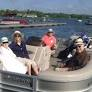

In [3]:
import pprint
pprint.pprint(r.json())

In [5]:
import pprint
pprint.pprint(r.json())

{'local_packs': [{'details': ['Sweetwater Pontoon Rentals4.8(561)',
                              'Boat rental serviceHendersonville, TNOpens soon '
                              '⋅ 9\u202fAM"The boats are clean, well kept, and '
                              'the lake is beautiful!"'],
                  'position': 5,
                  'rating': 4.8,
                  'rating_vote_count': 561,
                  'title': 'Sweetwater Pontoon Rentals'},
                 {'details': ['Pelican Bay at Cherry Creek4.4(468)',
                              'Boat rental serviceGreenwood Village, CO"The '
                              'boat was clean and ready for us."'],
                  'position': 6,
                  'rating': 4.4,
                  'rating_vote_count': 468,
                  'title': 'Pelican Bay at Cherry Creek'},
                 {'details': ['Naples Boat Rentals by On The Pontoon '
                              'Boat4.7(177)',
                              'Boat rental 

In [1]:
import requests
import json

url = "https://google.serper.dev/search"

payload = json.dumps({
  "q": "Pontoon Boat Rentals in United States"
})
headers = {
  'X-API-KEY': '52a8dba98760f3aa40321a798ad8d70407e8945c',
  'Content-Type': 'application/json'
}

response = requests.request("POST", url, headers=headers, data=payload)

print(response.text)

{"searchParameters":{"q":"Pontoon Boat Rentals in United States","type":"search","engine":"google"},"organic":[{"title":"2025 Top United States Pontoon Boat Rentals | Getmyboat","link":"https://www.getmyboat.com/boat-rental/pontoon-boat-rentals/United-States/","snippet":"The best pontoon rentals in the United States. Browse, book, and get out onto the water with local captains and boat owners.","rating":4.9,"ratingCount":500000,"position":1},{"title":"Pontoon Boat Rentals Near You - Getmyboat.com","link":"https://www.getmyboat.com/boat-rental/pontoon-boat-rentals/","snippet":"Top Pontoon Rental Locations in the United States · Tampa, Florida. 448 listings · Destin, Florida. 143 listings · Clearwater, Florida. 260 listings · Austin, Texas.","rating":4.9,"ratingCount":500000,"position":2},{"title":"Ten Beautiful Lakes in the U.S. with Pontoon Boat Rentals","link":"https://www.kuhl.com/borninthemountains/ten-beautiful-lakes-in-the-us-with-pontoon-boat-rentals?srsltid=AfmBOoownwtcW2u_p9ZtY

In [6]:
import pprint as pprint
pprint.pprint(response.json())


{'credits': 1,
 'organic': [{'link': 'https://www.getmyboat.com/boat-rental/pontoon-boat-rentals/United-States/',
              'position': 1,
              'rating': 4.9,
              'ratingCount': 500000,
              'snippet': 'The best pontoon rentals in the United States. '
                         'Browse, book, and get out onto the water with local '
                         'captains and boat owners.',
              'title': '2025 Top United States Pontoon Boat Rentals | '
                       'Getmyboat'},
             {'link': 'https://www.getmyboat.com/boat-rental/pontoon-boat-rentals/',
              'position': 2,
              'rating': 4.9,
              'ratingCount': 500000,
              'snippet': 'Top Pontoon Rental Locations in the United States · '
                         'Tampa, Florida. 448 listings · Destin, Florida. 143 '
                         'listings · Clearwater, Florida. 260 listings · '
                         'Austin, Texas.',
              '